## Validation Rules for Taiwan ID

### 1. Map the first digit (English letter) to a 2-digit number

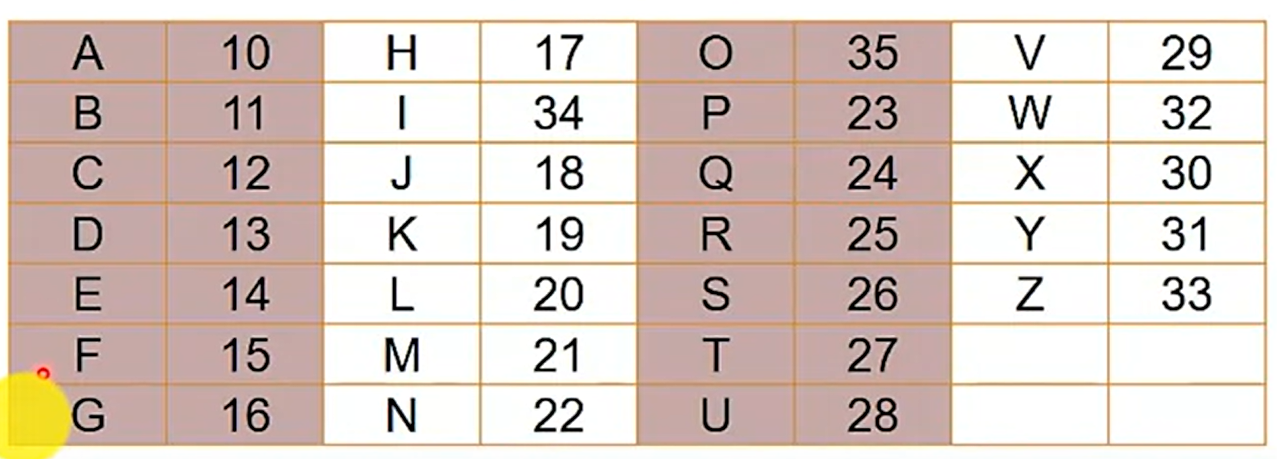

### 2. Attach the 2-digit number to the front of the remaining 9-digit ID, resulting in 11-digit number.

### 3. Compute a weighted sum of the 11-digit number. Weights = [1, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1]

### 4. Divide the weighted sum by 10. Compute the remainder..

### 5. If the remainder is 0, then it is valid. Otherwise, invalid.

In [7]:
# I want to see all results line by line in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [8]:
print(ord('A'))
print(ord('B'))
print(ord('C'))
print(ord('D'))
print(ord('E'))

65
66
67
68
69


In [18]:
idstr = input()

# find the code for a letter.
cmap = [10, 11, 12, 13, 14, 15, 16, 17, 34, 18, 19, 20, 21, 22, 35, 23, 24, 25, 26, 27, 28, 29, 32, 30, 31, 33]
code = cmap[ord(idstr[0]) - 65]
print(code)
"""
ord('A') is 65
cmap[0] is 10  The weight of A is 10.
cmap[1] is 11  The weight of B is 11.
cmap[2] is 12  The weight of C is 12.
.
.
.
"""
# Attach the converted 2-digit number to the front
id_allNum = str(code) + idstr[1:] # This is a string.
print("converted id:", id_allNum)

# Compute a weighted sum of the 11-digit number. 
weights = [1, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1]
wsum = 0
for i in range(len(weights)):
    wsum += int(id_allNum[i]) * weights[i]
print(wsum)

result = 'Valid ID' if (wsum % 10 == 0) else 'Invalid ID'
print(result)

D120018682
13


"\nord('A') is 65\ncmap[0] is 10  The weight of A is 10.\ncmap[1] is 11  The weight of B is 11.\ncmap[2] is 12  The weight of C is 12.\n.\n.\n.\n"

converted id: 13120018682
100
Valid ID


### Put everything in a function:

In [23]:
def verify_id(idstr):
    """
    This function is to verify Taiwanese ID.
    Return True if valid;False otherwise.
    """
    # check length
    if len(idstr) != 10:
        return False
    # check first letter
    if ord(idstr[0]) < 65 or ord(idstr[0]) > 90:
        # A, B, C,... Z -> 65 ~ 90 (ASCII)
        return False
    # check the remaining digits
    for i in range(1, 10):
        if ord(idstr[i]) < 48 or ord(idstr[i]) > 57:
            # ASCII of 0 ~ 9 : 48 ~ 57
            return False
        
    # find the code for a letter.
    cmap = [10, 11, 12, 13, 14, 15, 16, 17, 34, 18, 19, 20, 21, 22, 35, 23, 24, 25, 26, 27, 28, 29, 32, 30, 31, 33]
    code = cmap[ord(idstr[0]) - 65]
    print("Code is:", code)
    
    # Attach the converted 2-digit number to the front
    id_allNum = str(code) + idstr[1:]   # Note that id_allNum is a string.
    print("converted id:", id_allNum)

    # Compute a weighted sum of the 11-digit number. 
    weights = [1, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1]
    wsum = 0
    for i in range(len(weights)):
        wsum += int(id_allNum[i]) * weights[i]
    print("Weighted Sum:", wsum)

    result = 'Valid ID' if (wsum % 10 == 0) else 'Invalid ID'
    print(result)

In [25]:
verify_id("A123456789")

Code is: 10
converted id: 10123456789
Weighted Sum: 130
Valid ID


In [29]:
verify_id("Z199999999")

Code is: 33
converted id: 33199999999
Weighted Sum: 299
Invalid ID


In [30]:
verify_id("Z199999990")

Code is: 33
converted id: 33199999990
Weighted Sum: 290
Valid ID
